# US CONSUMER FINANCE COMPLAINTS

In [48]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy  as np


In [49]:
# asignamos la data a la variable DF que corresponde a DATAFRAME (estructura de datos)
df = pd.read_csv("consumer_complaints.csv")

C:\Users\DiezPro\AppData\Local\Temp\ipykernel_6124\1449945715.py:2: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("consumer_complaints.csv")


In [50]:
#la  función shape te muestra la cantidad de filas y columnas (x,y)
df.shape
#limpieza
df=df.drop_duplicates()


In [51]:
#identifico el tipo de dato de cada columna
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [52]:
#formato
df["date_recieved"]=pd.to_datetime(df["date_received"], format="%m/%d/%Y")


In [53]:
#confirmo el cambio de formatos
df.dtypes

date_received                           object
product                                 object
sub_product                             object
issue                                   object
sub_issue                               object
consumer_complaint_narrative            object
company_public_response                 object
company                                 object
state                                   object
zipcode                                 object
tags                                    object
consumer_consent_provided               object
submitted_via                           object
date_sent_to_company                    object
company_response_to_consumer            object
timely_response                         object
consumer_disputed?                      object
complaint_id                             int64
date_recieved                   datetime64[ns]
dtype: object

In [38]:
unique= df["issue"].unique()
unique

array(['Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account',
       'Incorrect information on credit report', 'Repaying your loan',
       'False statements or representation',
       'Application processing delay', 'Credit line increase/decrease',
       'Deposits and withdrawals',
       "Cont'd attempts collect debt not owed",
       'Credit decision / Underwriting',
       'Application, originator, mortgage broker',
       'Communication tactics', 'Late fee',
       'Improper contact or sharing of info', 'Billing disputes',
       'Making/receiving payments, sending money', 'Rewards',
       'Managing the loan or lease', 'Settlement process and costs',
       'Taking/threatening an illegal action',
       'Disclosure verification of debt',
       'Identity theft / Fraud / Embezzlement',
       'Customer service / Customer relations',
       'Forbearance / Workout plans', 'Closing/Cancelling account',
       'Improper use of my credit report'

In [ ]:
#dataframe punto info provee todas las columnas  con su # de índice para una más rapida identificación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [57]:
df["company_response_to_consumer"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
555952    False
555953    False
555954    False
555955    False
555956    False
Name: company_response_to_consumer, Length: 555957, dtype: bool

In [59]:
df["company_response_to_consumer"].isnull().any()


False

# Qué problemas son los más habituales?
## A través de un gráfico de barras podemos ver que...

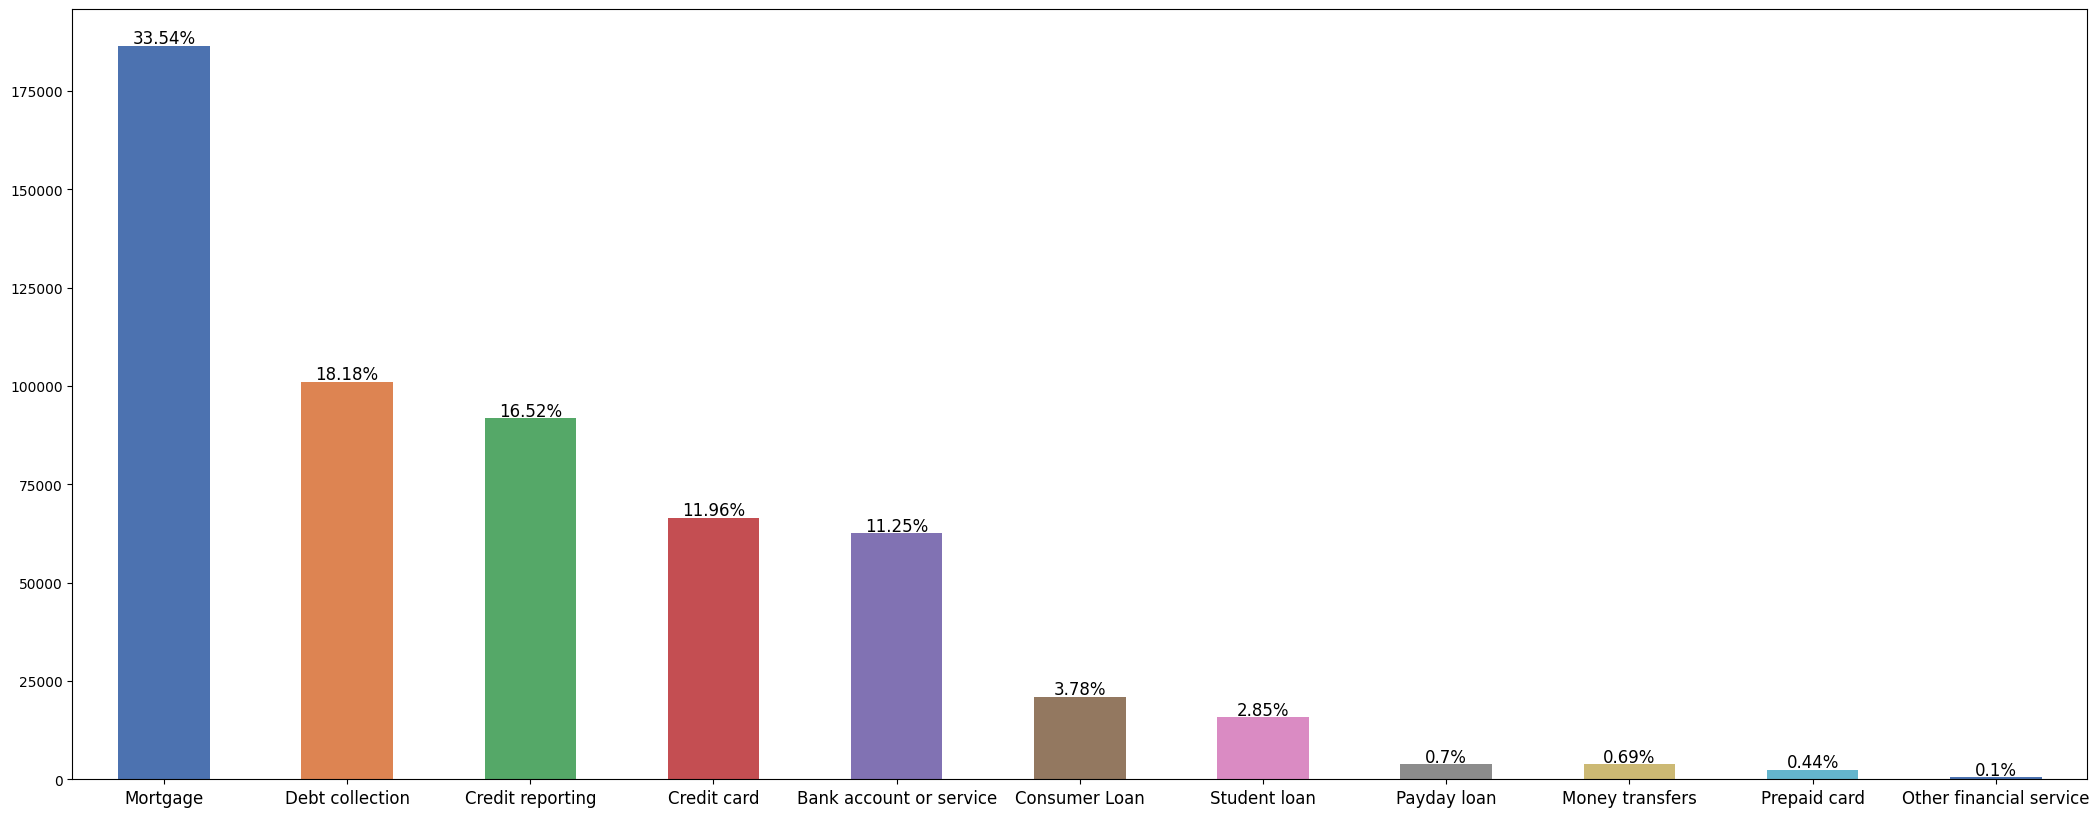

In [4]:
#pedimos conteo de cada valor de producto
count_product=df["product"].value_counts()
#para añadir los % hay que sacar dichos porcentajes primero
percentages = count_product/len(df)*100
#defino el color de mi gráfica con libreria seaborn
colors = sns.color_palette("deep")
#antes de ejecutar la gráfica que quiero, le doy las dimensiones que me interesan
fig,ax = plt.subplots(figsize=(26,10))
#le pido con la librería panda que me de un gráfico de barras
ax= count_product.plot(kind="bar", color=colors)
#modificamos la rotación y tamaño de fuente del eje x
ax.set_xticklabels(count_product.index, rotation=360,fontsize=12)
#agregamos los porcentajes arriba de cada barra
for i, v in enumerate(count_product):
    ax.text(i,v+len(df)*0.001, f'{round(percentages[i],2)}%' , fontsize=12, ha= "center" )
#mostramos con matplotlib.pyplot
plt.show()

### A través del diagrama de barras observamos que las hipotécas, el cobro de deuda, el reporte crediticio, tarjetas de crédito, servicio y cuenta de bancos represetan la mayoría de las quejas de los consumidores financieros de EEUU

# Qué BANCOS son los más habituales a recibir quejas?
## A través de un gráfico de pie vemos los bancos más  "representativos"


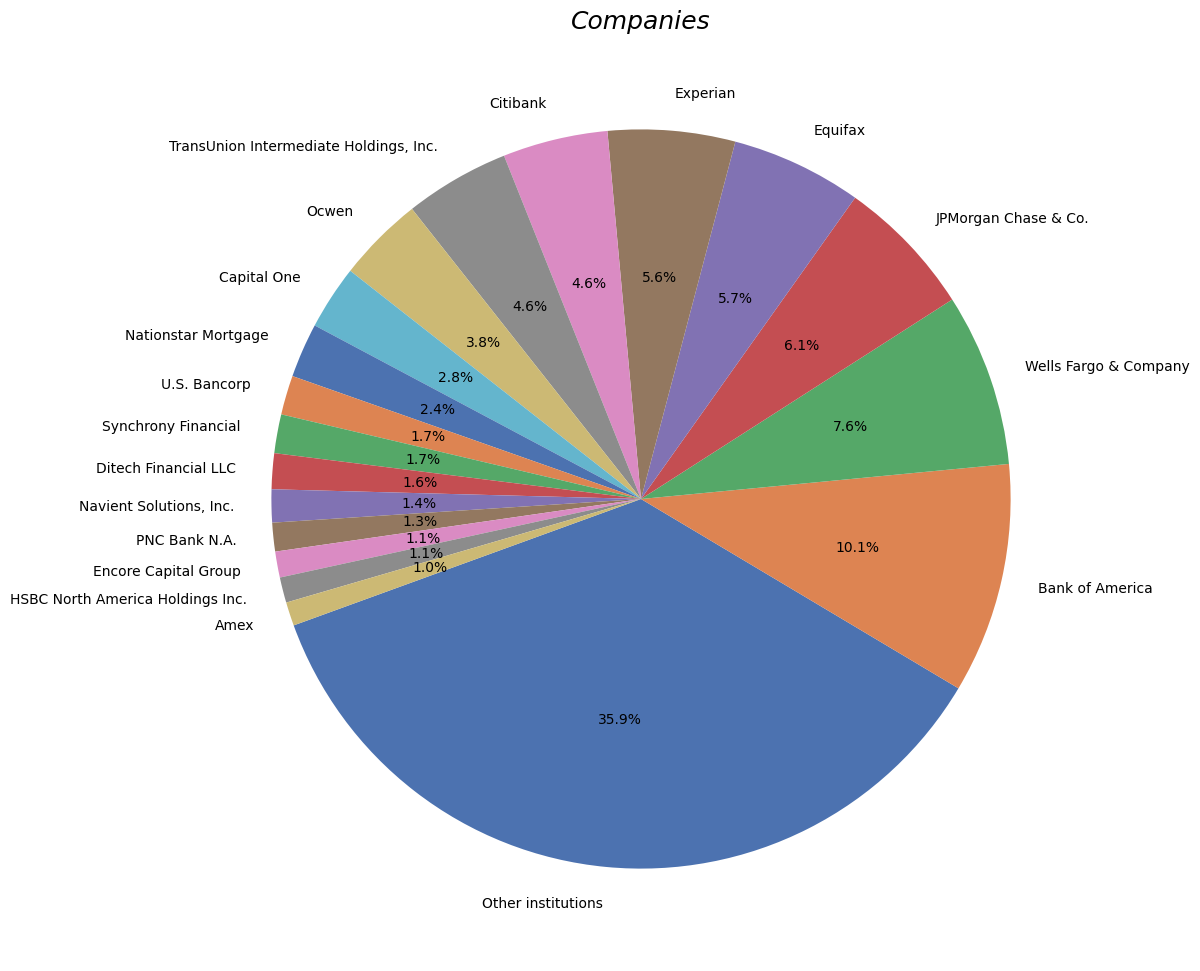

In [34]:
#pedimos conteo de cada valor de producto
bank_company_counts = df["company"].value_counts()
#para añadir los % hay que sacar dichos porcentajes primero
percentages_bank = bank_company_counts / len(df)*100 
#creamos una nueva columna con el nombre de la empresa 
df["company_name"] = df["company"]
#agrupamos aquella que cumplan con la conidción
df["company_name"] = df["company_name"].apply(lambda x: "Other institutions" if percentages_bank[x] < 1 else x)
# Contamos el número de empresas por nombre de empresa
bank_company_counts = df["company_name"].value_counts()
# Calculate the percentage of each company
percentages = bank_company_counts/sum(bank_company_counts)*100
#defino el color de mi gráfica con la librería seaborn
colors = sns.color_palette("deep")
#antes de ejecutar la gráfica que quiero, le doy las dimensiones que me interesan
fig,ax=plt.subplots(figsize=(16,12))
#le pido con la librería panda que me de un gráfico de pie
ax = bank_company_counts.plot(kind="pie", startangle=200, colors=colors, autopct ='%1.1f%%')
ax.set_ylabel("")
ax.set_title("Companies",fontsize=18, fontstyle='italic')
plt.show()


### Encontramos también que los que presentan mayor número de quejas son el banco de américa, wells fargo and company y JP Morgan Chase. 

In [63]:
uniqueresponse=df["company_response_to_consumer"].unique()
uniqueresponse

array(['Closed with explanation', 'Closed with monetary relief',
       'Closed with non-monetary relief', 'Closed', 'Untimely response',
       'In progress', 'Closed without relief', 'Closed with relief'],
      dtype=object)

# ¿Cuál es el  estado de estadas quejas?
## A través de un gráfico de barras veremos la distribución


<AxesSubplot: title={'center': 'Distribución porcentual de las quejas según su estado de respuesta de la companía'}>

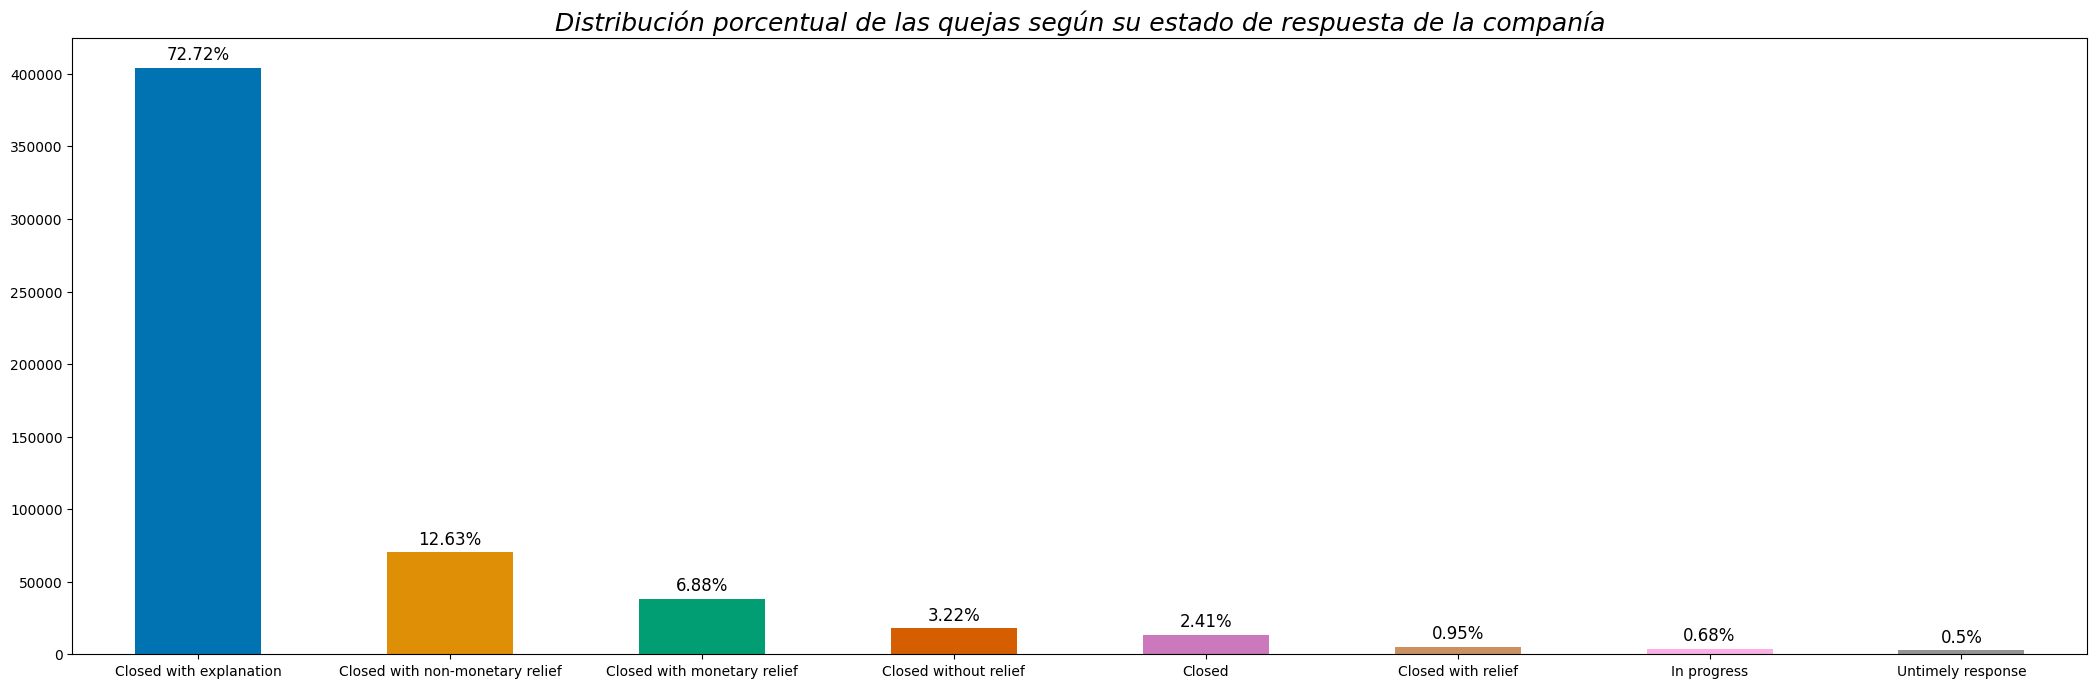

In [82]:
bar2=df["company_response_to_consumer"].value_counts()
percentages2=bar2/len(df)*100
fig,ax=plt.subplots(figsize=(26 ,8))
color=sns.color_palette("colorblind")
bar2official= bar2.plot(kind="bar",color=color)
for i,v in enumerate(bar2):
    ax.text(i,v+len(df)*0.01,f'{round(percentages2[i],2)}%', fontsize =12,ha="center")
ax.set_xticklabels(bar2.index ,rotation=360)
ax.set_title("Distribución porcentual de las quejas según su estado de respuesta de la companía",fontsize=18, fontstyle='italic')
bar2official

### Hallamos que la mayoría de quejas ya han sido respondidas y sustentadas por la empresa responsable, cerrado con respaldo momnetario, con respaldo no monetario y cerrado sin saciar a la parte demandante.

In [83]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,date_recieved
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,2013-08-30
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,2013-08-30
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,2013-08-30
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,2013-08-30
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,2013-08-30


# Cuál es la eficacia en respuesta de las entidades responsables 
## A través de un diagrama de Pie veremos esta diferencia dicotómica

<AxesSubplot: title={'center': 'Proporción porncetual de la efectivdad de respuesta de lasentidades repsonsables'}>

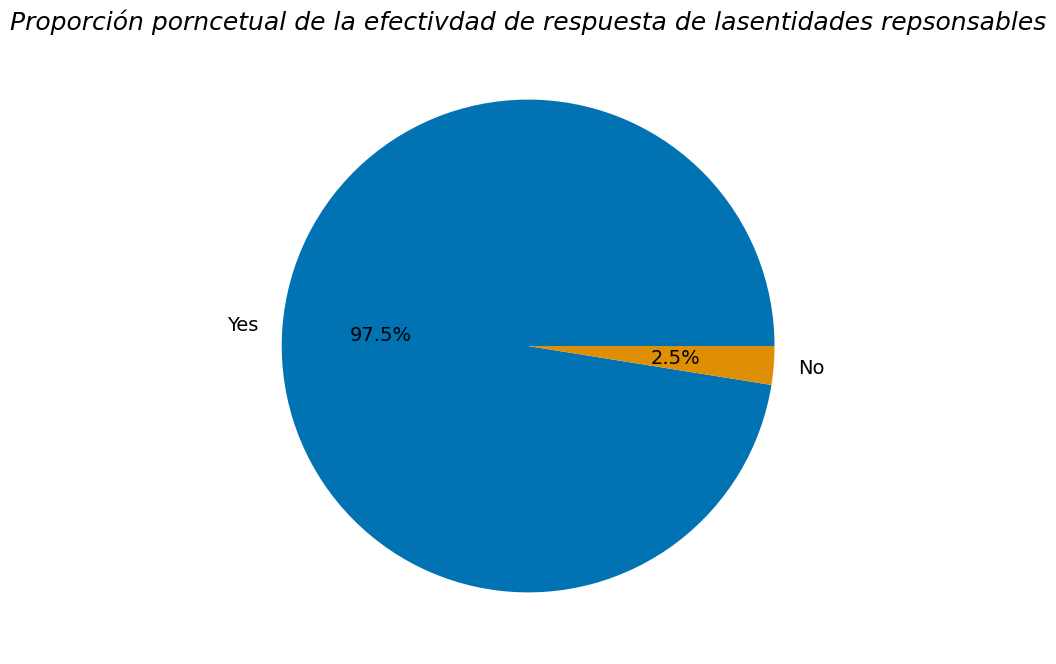

In [102]:
anwser_count = df["timely_response"].value_counts()
percentages_answer=anwser_count/len(df)*100
fig,ax=plt.subplots(figsize=(16,8))
color=sns.color_palette("colorblind")
pie=anwser_count.plot(kind="pie",colors=color,autopct="%1.1f%%")
pie.set_title("Proporción porncetual de la efectivdad de respuesta de lasentidades repsonsables",fontsize=18, fontstyle="italic")
pie.set_ylabel("")
for text in pie.texts:
    text.set_fontsize(14)
pie